---
# `Содержание`
---

<br>

 [**Задачи**](#Задачи:) :
 
 
1. [**Задание**](#Задание-№1)

    1.1 [*Подготовительный этап*](#1.1-Подготовительный-этап)
    
    1.2 [*Решение*](#1.2-Решение)
    
    1.3 [*Результат*](#1.3-Результат)
    
    
2. [**Задание**](#Задание-№2)

    2.1 [*Подготовительный этап*](#2.1-Подготовительный-этап)
    
    2.2 [*Решение*](#2.2-Решение)
    * [Conversion rate в покупку](#Conversion-rate-в-покупку)
    * [ARPU](#ARPU)
    
    
   2.3 [*Выводы*](#2.3-Выводы)
    
    
3. [**Задание**](#Задание-№3)

    3.1 [*Решение*](#3.1-Решение)
<br><br><br><br><br><br><br>

---
[**README проекта-->**](https://github.com/IvanoVladimir/karpov_courses/blob/main/Final_project/README.md 'Ссылка на описание проекта')
---


---
## Задачи:
---
<br><br><br><br><br>

Представьте, что вы работаете в компании, которая разрабатывает мобильные игры. К вам пришел менеджер с рядом задач <br>по исследованию нескольких аспектов мобильного приложения:<br><br>

1. В первую очередь, его интересует показатель retention. Напишите функцию для его подсчета.


2. Помимо этого, в компании провели A/B тестирование наборов акционных предложений. На основе имеющихся данных определите,<br> какой набор можно считать лучшим и на основе каких метрик стоит принять правильное решение.


3. Предложите метрики для оценки результатов последнего прошедшего тематического события в игре.

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

<br><br>

---
## [**`Задание №1`**](#Содержание)
---
<br><br>

Retention – один из самых важных показателей в компании. Ваша задача – написать функцию,<br> которая будет считать retention игроков (по дням от даты регистрации игрока).<br> Данные лежат в папке **`shared`**и имеют следующую структуру:


- **`shared/problem1-reg_data.csv`** – данные о времени регистрации

reg_ts      |uid
:-          |:-
06166566    |2
906344325   |2
906686169   |2
906893386   |2
906980227   |2

- **`shared/problem1-auth_data.csv`** – данные о времени захода пользователей в игру

auth_ts	    |uid
:-          |:-
906166566	|2
924422172	|3
937374732	|4
947425117	|5
955630339	|6

<br>

Функция должна быть написана на python. В ходе решения можно тестировать работу функции,<br> как на полном датасете, так и на части (сэмпле) данных.

<br><br>

---
###  [**`1.1 Подготовительный этап`**](#Содержание)
---

In [1]:
import os
import requests
import pandas as pd
import seaborn as sns
import pingouin as pg 
import scipy.stats as sps

from datetime import datetime
from urllib.parse import urlencode
from scipy.stats import chi2_contingency, chi2

In [2]:
path = 'C:/Users/volod/YandexDisk/JupyterLab/GitHub/karpov_courses/Final_project/'

In [3]:
'''
создал пустой список, в который складываются нужные данные
и сразу конвертируются столбцы с типом timestamp в datetime 
с помощью вложенных циклов и условий
'''

dfs = []
         
for root, dirs, files in os.walk(path):

    for file in files:

        if file.startswith('problem1'):
        
            df = pd.read_csv((root + file), sep=';')
            col = pd.to_datetime(df.iloc[:, 0], unit='s').dt.date
            df.iloc[:, 0] = pd.to_datetime(col)
            dfs.append(df)

***Комментарии к предыдущему блоку кода***:

Поступил так исходя из универсальности чтения данных. Например:
- При добавлении новой таблицы со схожей структурой 
в ту же директорию её уже не нужно считывать дополнительно<br> — она также попадет в результирующий список, если будет содержать необходимые символы в начале названия.

In [4]:
# функция основной необходимой информации по таблице

def _get_info(table):
    
    shapes = table.shape
    types = table.dtypes
    nuniques = table.nunique()
    miss_val = table.isna().any(axis=1).sum()
    duplicates = table.loc[table.duplicated()].count().sum()
    
    print('Таблица содержит' + f' {shapes[0]}', 'строк и', 
                               f'{shapes[1]}', 'столбцов,',
                               f'{miss_val}', 'пропусков и', 
                               f'{duplicates}', 'дубликатов.\n', 
                                '\nТип данных:', 
                               f'\n{types}',
                                '\n\nЧисло уникальных значений:', 
                               f'\n{nuniques}'
          )

In [5]:
# данные о времени регистрации и некоторая информация

reg_data = dfs[0]

_get_info(reg_data)
reg_data.head(3)

Таблица содержит 9601013 строк и 2 столбцов, 0 пропусков и 0 дубликатов.
 
Тип данных: 
auth_ts    datetime64[ns]
uid                 int64
dtype: object 

Число уникальных значений: 
auth_ts       6169
uid        1000000
dtype: int64


,auth_ts,uid
0,1998-11-18,1
1,1999-07-22,2
2,1999-07-25,2


In [6]:
# данные о времени захода пользователей в игру и некоторая информация

auth_data = dfs[1]

_get_info(auth_data)
auth_data.head(3)

Таблица содержит 1000000 строк и 2 столбцов, 0 пропусков и 0 дубликатов.
 
Тип данных: 
reg_ts    datetime64[ns]
uid                int64
dtype: object 

Число уникальных значений: 
reg_ts       5110
uid       1000000
dtype: int64


,reg_ts,uid
0,1998-11-18,1
1,1999-07-22,2
2,2000-01-13,3


In [7]:
# объединение обеих таблиц в одну и вывод информации

Task1 = auth_data.merge(reg_data, how='outer', on='uid')

_get_info(Task1)
Task1.head(2)

Таблица содержит 9601013 строк и 3 столбцов, 0 пропусков и 0 дубликатов.
 
Тип данных: 
reg_ts     datetime64[ns]
uid                 int64
auth_ts    datetime64[ns]
dtype: object 

Число уникальных значений: 
reg_ts        5110
uid        1000000
auth_ts       6169
dtype: int64


,reg_ts,uid,auth_ts
0,1998-11-18,1,1998-11-18
1,1999-07-22,2,1999-07-22


In [8]:
# минимальное количество дней с момента регистрации на день захода в игру
# отрицательное значение может говорить об ошибках в данных

(Task1.auth_ts - Task1.reg_ts).dt.days.min()

0

-----
###  [**`1.2 Решение`**](#Содержание)
-----

Чтобы рассчитать *Retention*, нужно знать количество активных пользователей определенной когорты по дням (неделям или месяцам).<br>Например:

- Взять число новых пользователей в Day 0 (день, когда группа пользователей пришла);


- Взять число активных пользователей в Day N (интересующий день для расчета метрики *Retention*);


- Разделить второе значение на первое, и результат умножить на 100.

**Формула расчета Retention:**

        Day N Retention = (Users Day N / Users Day 0) * 100

In [9]:
# аргументы для параметров определяющих размер когорт и временной интервал

daily, weekly, monthly, quarterly, yearly = (['D', 'Daily'], ['W', 'Weekly'], ['M', 'Monthly'],
                                             ['q', 'Quarterly'], ['Y', 'Yearly'])

# функция динамического расчёта Retention с визуализацией
def _get_retention(users, 
                   reg_date,
                   auth_date,
                   cohort_start='0001',
                   cohort_end=f'{datetime.now()}',
                   cohort_size=yearly,
                   time_interval=yearly,
                   time_period=0
                  ):

    # сбор данных для расчёта Retention из вводных данных
    # динамическое изменение названия колонок размера когорт 
    # и временного интервала в зависимости заданных параметров
    df = users.to_frame()
    df[f'{cohort_size[1]}' + ' cohorts'] = reg_date.dt.to_period(f'{cohort_size[0]}')
    df[f'{time_interval[1]}' + ' interval'] = pd.Series((auth_date - reg_date).values
                                                                              .astype('timedelta64' + f'[{time_interval[0]}]')
                                                                              .astype(int))
                            
    # создание сводной таблицы и расчёт Retention из собранных данных 
    pivot = df.pivot_table(index=df.columns[1], columns=df.columns[2], values=df.columns[0], aggfunc='nunique')
    pivot = pivot.div(pivot.iloc[:, 0], axis = 0).mul(100)
   
    # замена значения нулевого интервала на количество пользователей в когорте
    pivot[0] = (df.groupby(df.columns[1]).nunique().iloc[:, 0])
    pivot = pivot.rename(columns={0: 'Quantity of users'})

    # регулировка временного горизонта,
    # а также периодов формирования когорт
    pivot = pivot.iloc[:, :time_period + 1]
    pivot = pivot.loc[pivot.index >= cohort_start]
    pivot = pivot.loc[pivot.index <= cohort_end]
    
    # визуальное оформление сводной таблицы
    style = (pivot.style.set_caption("Расчёт Retention")  # добавляем подпись
                        .format('{:.2f}', na_rep='')  #  форматируем числа, NaN заменяем на пустоту
                        .background_gradient(cmap='Blues', vmin=0.1, vmax=11.0, axis=None)  # раскрашиваем ячейки 
                        .set_table_styles([{'selector': '', 
                                            'props': [('color', 'black'),
                                                      ('border-style', 'solid'),
                                                      ('border-width', '3px')]
                                            }, 
                                           {'selector': 'th', 
                                            'props': [('background-color', 'grey')]
                                            },
                                           {'selector': 'td', 
                                            'props': [('color', 'black')]}
                                           ])             
             )
    
    return style


**Описание параметров определяющих результат расчёта Retention с визуализацией:**
1. **`users`** – принимает на вход столбец с ID пользователей, **`reg_date/auth_date`** – даты регистрации/авторизации пользователей;
2. **`cohort_size`** – размер когорты(по умолчанию по годам), принимает на вход аргументы формирующие размер по:
 * *daily* – дням
 * *weekly* – неделям
 * *monthly* – месяцам
 * *quarterly* – кварталам
 * *yearly* – годам
 
 
3. **`cohort_start`** – принимает на вход строковый аргумент в формате "год-месяц-день" определяющий начало формирования когорт,<br> (по умолчанию первый год нашей эры);
4. **`cohort_end`** – принимает на вход строковый аргумент в формате "год-месяц-день" определяющий окончание формирования когорт<br>(по умолчанию текущая дата);
5. **`time_interval`** – принимает на вход аргументы определяющие временной интервал(по умолчанию по годам) по:
 * *daily* – дням
 * *weekly* – неделям
 * *monthly* – месяцам
 * *yearly* – годам
 
 
6. **`time_period`** – принимает на вход численный аргумент определяющий временной горизонт(по умолчанию покажет только количество<br> пользователей в когорте за определенное начало и окончание её формирования).

***Правила и рекомендации по использованию функции:***
- [x] в структуре таблицы обязательно должны быть столбцы со следующими данными:
 1. ID пользователя
 2. дата регистрации пользователя
 3. дата авторизации пользователя<br><br>
- [x] параметры выставлять согласно описанию, во избежания ошибок;
- параметры **`cohort_start и cohort_end`** также работают в формате "год-месяц" и "год";
- для удобства ниже перед в функцией расположены аргументы для копирования в функцию,<br>
  и даты начала и окончания формирования когорт для текущего задания.

-----
###  [**`1.3 Результат`**](#Содержание)
-----

In [10]:
daily, weekly, monthly, quarterly, yearly

Task1[['reg_ts', 'auth_ts']].agg(['min', 'max'])

,reg_ts,auth_ts
min,1998-11-18,1998-11-18
max,2020-09-23,2020-09-23


In [11]:
# пример работоспособности функции

_get_retention(users=Task1['uid'],
               reg_date = Task1['reg_ts'],
               auth_date = Task1['auth_ts'],
               cohort_start='2018-06-01',
               cohort_end='2019-12',
               cohort_size=quarterly,
               time_interval=monthly,
               time_period=24
              )

Monthly interval,Quantity of users,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
Quarterly cohorts,,,,,,,,,,,,,,,,,,,,,,,,,
2018Q2,36347.00,10.50,5.21,5.21,5.21,5.21,5.21,5.21,5.21,5.21,5.21,5.21,5.21,5.21,5.21,5.21,5.21,5.21,5.21,5.21,5.21,5.21,5.21,5.21,5.21
2018Q3,42715.00,9.99,4.89,4.89,4.89,4.89,4.89,4.89,4.89,4.89,4.89,4.89,4.89,4.89,4.89,4.89,4.89,4.89,4.89,4.89,4.89,4.89,4.89,4.89,4.35
2018Q4,49690.00,10.32,4.98,4.98,4.98,4.98,4.98,4.98,4.98,4.98,4.98,4.98,4.98,4.98,4.98,4.98,4.98,4.98,4.98,4.98,4.98,4.38,2.68,1.07,
2019Q1,56455.00,10.31,5.03,5.03,5.03,5.03,5.03,5.03,5.03,5.03,5.03,5.03,5.03,5.03,5.03,5.03,5.03,5.03,4.52,2.77,1.12,,,,
2019Q2,66242.00,10.34,5.09,5.09,5.09,5.09,5.09,5.09,5.09,5.09,5.09,5.09,5.09,5.09,5.09,4.57,2.84,1.12,,,,,,,
2019Q3,77845.00,10.22,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,4.48,2.75,1.16,,,,,,,,,,
2019Q4,90560.00,10.33,5.02,5.02,5.02,5.02,5.02,5.02,5.02,4.46,2.73,1.09,,,,,,,,,,,,,


***В результате этого примера получилась сводная таблица с визуализацией, где когорты сформированы поквартально в период с середины 2018 по окончание 2019 года и отображают показатели retention за последние 24 месяца.***

<br><br><br>

---
## [**`Задание №2`**](#Содержание)
---

<br><br><br>

Имеются результаты A/B теста, в котором двум группам пользователей предлагались различные наборы акционных предложений. <br>Известно, что ARPU в тестовой группе выше на 5%, чем в контрольной. При этом в контрольной группе 1928 игроков из 202103 оказались платящими, а в тестовой – 1805 из 202667.


Какой набор предложений можно считать лучшим? Какие метрики стоит проанализировать для принятия правильного решения и как?


**`Формат`**[**<u>`данных`</u>**](https://yadi.sk/d/SOkIsD5A8xlI7Q "Ссылка на задание в Яндекс диск"):


user_id	|revenue |testgroup
-:      |-:      |-:
1	    |0	     |b
2	    |0	     |a
3	    |0	     |a
4	    |0	     |b
5	    |0	     |b

<br><br><br><br><br><br><br><br><br><br><br><br><br><br>

-----
###  [**`2.1 Подготовительный этап`**](#Содержание)
-----

In [12]:
# использую api Яндекс диска

base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
pub_key = 'https://yadi.sk/d/SOkIsD5A8xlI7Q' 

In [13]:
# получаю url

final_url = base_url + urlencode(dict(public_key=pub_key)) 
response = requests.get(final_url) 
load_url = response.json()['href'] 

In [14]:
# загружаю файл в таблицу и вывожу информацию

load_resp = requests.get(load_url) 
Task2 = pd.read_csv(load_url, sep=';')

_get_info(Task2) 
Task2.head()

Таблица содержит 404770 строк и 3 столбцов, 0 пропусков и 0 дубликатов.
 
Тип данных: 
user_id       int64
revenue       int64
testgroup    object
dtype: object 

Число уникальных значений: 
user_id      404770
revenue        1477
testgroup         2
dtype: int64


,user_id,revenue,testgroup
0,1,0,b
1,2,0,a
2,3,0,a
3,4,0,b
4,5,0,b


In [15]:
# смотрю нет ли пересечений между контрольной и тестовой группой

gr_A = set(Task2.query('testgroup == "a"')['user_id'])
gr_B = set(Task2.query('testgroup == "b"')['user_id'])

if gr_A.intersection(gr_B) is True:
    
    print('Присутствуют пересечения в группах.') 

else:
    
    print('Пересечения в группах отсутствуют.')

Пересечения в группах отсутствуют.


In [16]:
# фильтрую платящих пользователей

client = Task2[Task2.revenue != 0]
client.head()

,user_id,revenue,testgroup
72,73,351,a
160,161,3797,b
341,342,290,a
377,378,3768,b
385,386,250,a


In [17]:
# описательная статистика выручки по группам активных пользователей

user_desc = Task2.groupby('testgroup').revenue.agg(['count', 'mean',
                                                    'median', 'std']).round(2)
user_desc

,count,mean,median,std
testgroup,,,,
a,202103,25.41,0.0,920.77
b,202667,26.75,0.0,287.32


C:\Users\volod\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


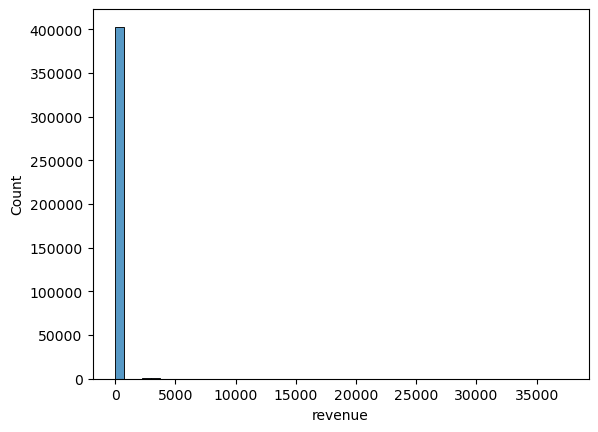

In [18]:
# распредление доходов активных пользователей

sns.histplot(data=Task2, x="revenue", bins=50);

In [19]:
# описательная статистика выручки по группам платящих пользователей

client_desc = client.groupby('testgroup').revenue.agg(['count', 'min', 'max', 'sum', 
                                                       'mean', 'median', 'std']).round(2)
client_desc

,count,min,max,sum,mean,median,std
testgroup,,,,,,,
a,1928,200,37433,5136189,2664.00,311.0,9049.04
b,1805,2000,4000,5421603,3003.66,3022.0,572.62


C:\Users\volod\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


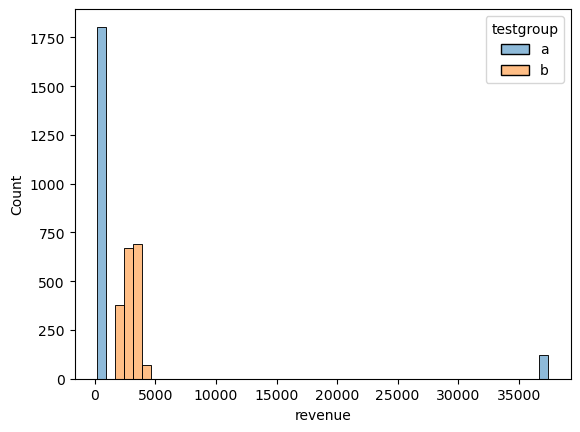

In [20]:
sns.histplot(data=client, x="revenue", hue='testgroup', bins=50);

C:\Users\volod\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


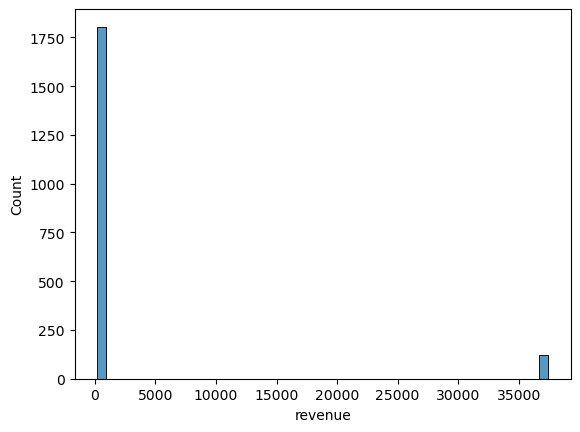

In [21]:
# распредление доходов платящих пользователей в группе А

sns.histplot(data=client.query('testgroup == "a"'), x="revenue", bins=50);

C:\Users\volod\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


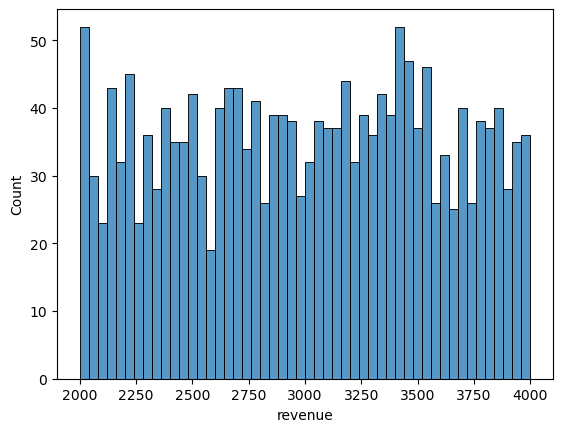

In [22]:
# распредление доходов платящих пользователей в группе B

sns.histplot(data=client.query('testgroup == "b"'), x="revenue", bins=50);

***На графиках распределения доходов платящих пользователей наблюдается следующее:***

- в контрольной группе огромное количество околонулевых значений и некоторое количество экстремальных значений;


- в тестовой группе более стабильное распределение вокруг определеных значений;


- распределение в группах не похоже на нормальное и к тому же оба они ни никак не пересекаются,<br> что возможно даже говорит о некорректности сплитования при проведении тестирования, но это только предположение.


---
###  [**`2.2 Решение`**](#Содержание)
---

По имеющимся данным, чтобы ответить на вопрос: "Какой набор предложений можно считать лучшим?",<br>
– проанализируем следующие метрики:

- ***Конверсия (conversion rate, CR)*** — отношение числа пользователей, которые выполнили какое-либо целевое действие к <br>общему числу пользователей. В нашем случае — конверсия в покупку;


- ***ARPU (Average revenue per user)*** — средний доход на активного пользователя. Считается путём деления выручки за<br> определённый период на количество активных пользователей за тот же период.

####  [***Conversion rate в покупку***](#Содержание)

In [23]:
# столбец с фактом оплаты акционного предложения

Task2['payment'] = Task2['revenue'].apply(lambda x: x != 0) * 1

In [24]:
# пропорции между группами пользователей и факта оплаты

pay_ratio = pd.crosstab(Task2['testgroup'], Task2['payment']) \
              .rename(columns={0: 'not_buy', 1: 'buy'}) 
pay_ratio

payment,not_buy,buy
testgroup,,
a,200175,1928
b,200862,1805


In [25]:
# процентная разница в конверсии между группами

CR_message = "Конверсия в группе {} больше на ~{} %."
CR_A = (pay_ratio.loc['a'][1] / user_desc.loc['a', 'count'])
CR_B = (pay_ratio.loc['b'][1] / user_desc.loc['b', 'count'])

if CR_A > CR_B:
    
    CR_diff = (CR_A / CR_B * 100 - 100).round(1)
    print(CR_message.format('A', CR_diff))
    
else:
    
    CR_diff = (CR_B / CR_A * 100 - 100).round(1)
    print(CR_message.format('B', CR_diff))

Конверсия в группе A больше на ~7.1 %.


C:\Users\volod\AppData\Local\Temp\ipykernel_6008\2634852120.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  CR_A = (pay_ratio.loc['a'][1] / user_desc.loc['a', 'count'])
C:\Users\volod\AppData\Local\Temp\ipykernel_6008\2634852120.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  CR_B = (pay_ratio.loc['b'][1] / user_desc.loc['b', 'count'])


**Конверсия в группе "А" оказалась выше**. Проверим значима ли эта разница статистически с помощью<br> 
непараметрического теста **Хи-квадрат**, который работает с категориальными данными.

In [26]:
# проверка гипотезы о статистической значимости

stat, p, dof, expected = chi2_contingency(pay_ratio)

H = '{}результат статистически {}значим.'

prob = 0.95
crit = chi2.ppf(prob, dof)
alpha = 1.0 - prob

if abs(stat) >= crit or p <= alpha:
    
    print(H.format('H1 – ', ''))

else:
   
    print(H.format('H0 – ', 'не '))

H1 – результат статистически значим.


In [27]:
# тот же тест из другой библиотеки

exp, obs, stats = pg.chi2_independence(data=Task2, x='testgroup', y='payment')

In [28]:
# результаты теста

stats[['test', 'pval', 'cramer']]

,test,pval,cramer
0,pearson,0.036476,0.003288
1,cressie-read,0.036473,0.003288
2,log-likelihood,0.036461,0.003288
3,freeman-tukey,0.036446,0.003288
4,mod-log-likelihood,0.036428,0.003288
5,neyman,0.036377,0.003289


####  [***ARPU***](#Содержание)

In [29]:
# распределение активных пользователей на группы

user_A = Task2.query('testgroup == "a"')['revenue']
user_B = Task2.query('testgroup == "b"')['revenue']

In [30]:
# процентная разница ARPU между группами активных пользоватей

ARPU_message = "Средний доход в группе {} больше на ~{} %."
ARPU_A = user_desc['mean'].loc['a']
ARPU_B = user_desc['mean'].loc['b']

if ARPU_A > ARPU_B:
    
    ARPU_diff = (ARPU_A / ARPU_B * 100 - 100).round(1)
    print(ARPU_message.format('A', ARPU_diff))
    
else:
    
    ARPU_diff = (ARPU_B / ARPU_A * 100 - 100).round(1)
    print(ARPU_message.format('B', ARPU_diff))

Средний доход в группе B больше на ~5.3 %.


In [31]:
# проверка распределений в группах на нормальность

normality = pg.normality(data=Task2, dv='revenue', 
                         group='testgroup', method='normaltest')

H = '{}распределение в группе {}нормально.'

if normality.loc['a']['normal'] is True:
    
    print(H.format('H0 – ', 'A'))

else:
    
    print(H.format('H1 – ', 'A не '))

if normality.loc['b']['normal'] is True:
    
    print(H.format('H0 – ', 'B'))

else:
    
    print(H.format('H1 – ', 'B не '))

H1 – распределение в группе A не нормально.
H1 – распределение в группе B не нормально.


In [32]:
# проверка гомогенности дисперсии в группах

stat, p = sps.levene(user_A, user_B)

H = '{}дисперсии в группах {}гомогенны.'

prob = 0.95
alpha = 1.0 - prob

if p >= alpha:
    
    print(H.format('H0 – ', ''))

else:
   
    print(H.format('H1 – ', 'не '))

H0 – дисперсии в группах гомогенны.


***ARPU в группе "B" оказался выше.*** Проверку статистической значимости проведем с помощью ***Т-теста Стьюдента***,<br>
для сравнения средних. Хоть распределения в группах и не нормальны, но размеры выборок позволяют этим в данном<br>
случае пренебречь, а дисперсии гомогенны.

In [33]:
# проверка гипотезы о статистической значимости

stat, p = sps.ttest_ind(user_A, user_B)

H = '{}результат статистически {}значим.'

prob = 0.95
alpha = 1.0 - prob

if p <= alpha:
    
    print(H.format('H1 – ', ''))

else:
   
    print(H.format('H0 – ', 'не '))

H0 – результат статистически не значим.


In [34]:
# тот же тест из другой библиотеки

pg.ttest(user_A, user_B)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.623488,240991.130782,two-sided,0.532965,"[-5.54, 2.87]",0.001962,0.004,0.095694


<br><br>

---
### [**`2.3 Выводы`**](#Содержание)
---
<br><br><br><br>

**Итоги:**

- **Конверия в покупку** контрольной группы **выше на ~7.1%**, результат **статистически значим**.


- **ARPU** тестовой группы **выше на ~5.3 %**, результат **статистически не значим**.


Таким образом, с точки зрения статистических тестов считаю, что **набор акционных предложений для контрольной группы<br> оказался лучше**, хотя и есть некоторые сомнения по поводу корректности проведения A/B теста, так как распределения в группах<br> платящих пользователей никак не пересекаются, образуя ярко выраженные сегменты, что возможно говорит о неправильной<br> системе сплитования, но это скорее предположение.

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

<br><br>

---
## [**`Задание №3`**](#Содержание)
---
<br><br><br><br><br>

В игре Plants & Gardens каждый месяц проводятся тематические события, ограниченные по времени. <br>
В них игроки могут получить уникальные предметы для сада и персонажей, дополнительные монеты или бонусы.<br> 
Для получения награды требуется пройти ряд уровней за определенное время.<br>
С помощью каких метрик можно оценить результаты последнего прошедшего события?


Предположим, в другом событии мы усложнили механику событий так, что при каждой неудачной попытке выполнения уровня<br> игрок будет откатываться на несколько уровней назад. Изменится ли набор метрик оценки результата? Если да, то как?

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

---
### 3.1 [**`Решение`**](#Содержание)
---


**Ответ на первый вопрос**
<br> <br><br> <br>
С помощью данных метрик, я бы стал оценивать результаты последнего прошедшего события:

- **ASD** — *Average Session Duration* — среднее время сессий за период времени. В нашем же случае за период последнего<br> прошедшего события. Разумеется, в период прохождения события, метрика должна быть выше, иначе<br> — это говорит об отсутствии интереса у игроков к его наградам. Метрику также можно сравнить с той же метрикой предыдущих<br> событий, чтобы посмотреть её в динамике. Считается как:
            
      ASD = Суммарная продолжительность сессии за период времени / Общее количество сессий за тот же период
<br>            

- **Stickiness rate** — регулярность появления активных игроков в течение месяца. Должна быть выше по тем же причинам, <br>что и в первом случае. Можно также сравнить с той же метрикой в предыдущие месяцы; в дни,<br> когда проходили предыдущие события. Считается так:

      Stickiness rate = DAU(количество активных игроков в день) / MAU(количество активных игроков в месяц) * 100
<br>

- **Retention rate** — процент пользователей, которые возвращаются в игру. Проведя когортный анализ можно посмотреть<br> насколько охотно пользователи возвращались в игру в период последнего прошедшего события. Формула расчёта:
    
      Day N Retention rate = (Количество пользователей в день N / Количество пользователей в день 0) * 100
<br>    

- **Churn rate** — процент пользователей, которые покидают в игру. Противоположный эквивалент ***Retention rate***.<br> Если во время проведения последнего тематического события метрика начала расти<br> — это может быть сигналом не только к самому контенту мероприятия, но и к его технической составляющей,<br> вызывающих негативные впечатления у игроков. Формула расчёта:

      Churn Rate = 100% − Retention rate
<br>

- **Game Ready API** — время от запуска игры до момента, когда игра загрузила все ресурсы и готова к взаимодействию с игроком.<br> Техническая метрика. Позволяет оценить состояние игры и в дальнейшем проанализировать факторы, которые могли повлиять на продолжительность загрузки, если оно сильно увеличилось во время проведения последнего тематического события;
<br><br><br>

- Различного рода "*узконаправленные*" метрики в рамках контента тематического события. Например:<br>

  1. **Среднее время на N уровень** = Суммарная продолжительность прохождения N уровня / количество игроков;
  <br>

  2. **Среднее количество пройденных уровней** = количество пройденных уровней / общее количество уровней;
  <br>
  
  3. **Среднее количество уникальных наград** = количество полученных уникальных наград / общее количество уникальных наград.
 <br> <br>      

<br><br>

**Ответ на второй вопрос**

<br><br>
Я думаю, что сам набор метрик, которые я смог придумать и найти в рамках данного задания, не поменяются,<br> скорее некоторые более "*узконаправленные*" из них будут "*модифицированы*" с учётом усложнения механики<br> и добавится несколько новых. Вот первая, которая приходит в голову:

    Среднее количество перепройденных уровней = общее количество перепройденных уровней / количество 
    после неудачной попытки                     после неудачной попытки                   игроков

Данная метрика может сказать нам на сколько средний игрок заинтересован в данном "*челлендже*" или его наградах,<br> либо на сколько данная механика оказалась сложной и более детально изучить сегменты игроков.

---
## [**`В начало проекта`**](#Содержание)
---